# Foundations of Data Science - Course Work


Snehaa Ganesan

sg4860@nyu.edu
***

### Part 1: Critique this plan (8 points)
1\. After a few beers your CIO invited his buddy from Green Berry consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Green Berry, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Green Berry says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Green Berry's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Green Berry Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Green Berry) have a 
large database of consumers who can be targeted.  We will build a predictive model 
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that logistic regression is the best choice of method be-
cause it is a tried-and-true statistical modeling technique, and we can easily 
interpret the coefficients of the model to infer whether the attributes are stat-
istically significant, and whether they make sense. If they are statistically sig-
nificant and they do make sense, then we can have confidence that the model will 
be accurate in predicting service uptake. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the LR model predicts to be the most likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

1. Weakness/Flaw : Poor Problem description - no objective target variable, lack of specificity of methodology
   Fix by : Being more objective about the problem, target variable, and the "sense" in "If they are statistically     significant and they do make sense"
   
2. Weakness/Flaw : Assumption not stated/realized that, current customers data(used in modeling) does not neccessarily reflect the behavior/data of customers not yet subscribed.
   Fix : Realize the assumption, and use a mix of current customers data + not yet customers(not subscribed) data.
  
3. Weakness/Flaw : Confidence of accurate prediction is guaranteed based on statistical significance of attributes if any. Despite, the methodology being is based on the assumption that currentcustomers data can be used to understand/predict behavior of notyet_customers.
   Fix: Instead of supporting confidence in accurate prediction, make use of computed accuracy and probablity of accurate prediction.
   
4. Weakness/Flaw : Fixed-profit-per-customer is based on prediction as from the LR model, hence, ranking them is not an insightful feature.
   Fix : Instead of ranking individual customers, grouped ranking based on features like demographics may be more insightful.

### Part 2: Sentiment analysis (12 points)

In this assignment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

The dataset and further description can be found here:
https://snap.stanford.edu/data/wiki-RfA.html

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



1\. Convert the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc. (3 points) 

In [1]:
#code here
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import os
from os import system
import csv
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer 
import networkx as nx
from pprint import pprint
from itertools import combinations
from random import randint
import networkx as nx
import timeit
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression

In [2]:
'''Reading txt file (input)   then, processing line by line to separate column name and entries/data'''

'Reading txt file (input)   then, processing line by line to separate column name and entries/data'

In [3]:
#Reading txt file
f = open("wiki-RfA.txt", 'r')
reader = csv.reader(f)
#f = (map(lambda x: x.encode("ascii", "ignore").split(), f))

#f = [line.decode('utf-8', 'ignore').strip() for line in f.readlines()]

list_of_lists = list()

#Line by line processing to separate column name from entry data
with open('wiki-RfA.txt') as f:
    for line in f:
            inner_list = [line.strip() for line in line.split(':')]
            list_of_lists.append(inner_list)
      
    

In [4]:
#Changing the input form from list to dataframe 
#and extracting only relevant columns(extra (not in real data)non empty cols)

df = pd.DataFrame(list_of_lists) #takes around 3 mins
df1= df[[0,1]]
#df1.head()

In [5]:
#Creating and adding the required columns to df1 and filling them with NaN (except column'Content')
df1 = df1.assign(SRC = "Nan")
df1 = df1.assign(TGT = "Nan")
df1 = df1.assign(VOT = "Nan")
df1 = df1.assign(RES = "Nan")
df1 = df1.assign(YEA = "Nan")
df1 = df1.assign(DAT = "Nan")
df1 = df1.assign(TXT = "Nan")
df1 = df1.assign(Content = "")

In [6]:
'''Text processing to add data to the respective columns (like, SRC data to SRC column, etc.)'''

'Text processing to add data to the respective columns (like, SRC data to SRC column, etc.)'

In [7]:
#Combining contents of columns 0 and 1 to fill column 'Content' (for future text processing)
df1['Content'] = df1[0].str.cat(df1[1])


#Performing string extract to extract data entry(to separate data of SRC and TGT)
#from each row in 'Content' and adding them to the correct column
# example, Steel1943 is added to SRC , BDD to TGT (where they belong).
df1[['S1','SRC']] = df1['Content'].str.extract(r'(^SRC{1})(.*)', expand=True)
df1[['S1','TGT']] = df1['Content'].str.extract(r'(^TGT{1})(.*)', expand=True)
df1[['S1','VOT']] = df1['Content'].str.extract(r'(^VOT{1})(.*)', expand=True)
df1[['S1','RES']] = df1['Content'].str.extract(r'(^RES{1})(.*)', expand=True)
df1[['S1','YEA']] = df1['Content'].str.extract(r'(^YEA{1})(.*)', expand=True)
df1[['S1','DAT']] = df1['Content'].str.extract(r'(^DAT{1})(.*)', expand=True)
df1[['S1','TXT']] = df1['Content'].str.extract(r'(^TXT{1})(.*)', expand=True)

In [8]:
#Replacing NaN by succeeding values in label(SRC,TGT,VOT,YEA,DAT,TXT) columns
#This forms the correct row entries as per original data , but only wherever the 1st column (0) is SRC
#All other rows where column[0] value is not SRC are incorrect and must be deleted (done in the next step)
df1 = df1.fillna(method='bfill')
#df1.head(9)

In [9]:
'''Filtering of data to remove the extra columns (content, S1), and to keep only the correct row-column entries'''

'Filtering of data to remove the extra columns (content, S1), and to keep only the correct row-column entries'

In [10]:
#Deleting extra columns (irrelevant / unneccesary columns)
df1.drop('Content', axis=1, inplace=True)
df1.drop('S1', axis=1, inplace=True)
#df1.head()

#Filtering out the data to keep only correct row column entries
#Deleting rows for which df1[0] does not match "SRC" 
#i.e. Keeping only correct entries as per original data
df1 = df1[(df1[0] == "SRC")]

In [11]:
#Dropping df1[0] and df1[1] columns since they are irrelevant
df1.drop(0, axis=1, inplace=True)
#198275  
df1.drop(1, axis=1, inplace=True)
#Changing index for proper indexing
df1.index = range(198275)

In [12]:
df1.head()


,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,23,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,01,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,23,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,00,"'''Support''', with great pleasure. I work wit..."


In [13]:
#End of part2-question1

2\. Using the VOT column as the target variable, code the values as -1 or 0  as '0' and 1 to stay as '1'. (1 point)


In [14]:
#Replacing the value -1 with 0
df1["VOT"] = df1["VOT"].replace('-1',0)
df1["VOT"] = df1["VOT"].replace('0',0)
df1["VOT"] = df1["VOT"].replace('1',1)
df1["VOT"].unique()

array([1, 0])

In [15]:
#Just rearranging columns to make VOT the last (target column)
df1 = df1[['SRC', 'TGT', 'RES', 'YEA', 'DAT', 'TXT', 'VOT']]
df1.head()


,SRC,TGT,RES,YEA,DAT,TXT,VOT
0,Steel1943,BDD,1,2013,23,'''Support''' as co-nom.,1
1,Cuchullain,BDD,1,2013,01,'''Support''' as nominator.--,1
2,INeverCry,BDD,1,2013,23,'''Support''' per noms.,1
3,Cncmaster,BDD,1,2013,00,'''Support''' per noms. BDD is a strong contri...,1
4,Miniapolis,BDD,1,2013,00,"'''Support''', with great pleasure. I work wit...",1


In [16]:
# End of part2-question2

3\. Put all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. (2 points)

In [17]:
#Creating X and Y dataframes
X = df1['TXT']
Y = df1['VOT']
X.head()
Y.head()
#type(Y)

0    1
1    1
2    1
3    1
4    1
Name: VOT, dtype: int64

In [18]:
#Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
#print x_test
#print y_test

In [19]:
'''End of part2 question 3'''

'End of part2 question 3'

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [20]:
''' Creating the binary CountVectorizer() -> vectorizer  : '''

' Creating the binary CountVectorizer() -> vectorizer  : '

In [21]:
#Creating the binary CountVectorizer() -> vectorizer  : 

#Setting token_pattern = r'\b\w+\b' to allow single character words
#Setting ngram_range(1,2) for single words and bigrams
#Setting stop_words='english' as asked

vectorizer = CountVectorizer(binary=True,  ngram_range=(1, 2), stop_words='english')

#fitting it(vectorizer) to train["TXT"]
vt1 = vectorizer.fit(X_train)

#Extracting vocabulary
vocab = vectorizer.vocabulary_

list(vocab.keys())[0:10]


[u'direct fault',
 u'wikipedia surely',
 u'cautious closing',
 u'administrators focus',
 u'helpful wp',
 u'writers make',
 u'using know',
 u'policy saying',
 u'time swing',
 u'thinks right']

In [22]:
#Transforming train for Count Vectorizer
X_train_binary = vectorizer.transform(X_train)

print("n_samples: %d, n_features: %d" % X_train_binary.shape)



n_samples: 148706, n_features: 616239


In [23]:
#Transforming test for Count Vectorizer
X_test_binary = vectorizer.transform(X_test)

print("n_samples: %d, n_features: %d" % X_test_binary.shape)




n_samples: 49569, n_features: 616239


In [24]:
''' Creating the binary tfidfVectorizer() -> tvectorizer  : '''

' Creating the binary tfidfVectorizer() -> tvectorizer  : '

In [25]:
#tfidf vectorizer :

#Setting token_pattern = r'\b\w+\b' to allow single character words
#Setting ngram_range(1,2) for single words and bigrams
#Setting stop_words='english' as asked


tvectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

tfidf_matrix = tvectorizer.fit(X_train)

#Extracting vocabulary
tvocab = tvectorizer.vocabulary_

list(tvocab.keys())[0:10]

[u'direct fault',
 u'wikipedia surely',
 u'cautious closing',
 u'administrators focus',
 u'helpful wp',
 u'writers make',
 u'using know',
 u'policy saying',
 u'time swing',
 u'thinks right']

In [26]:
#Transforming train for tfidf vectorizer
X_train_tfidf = tvectorizer.transform(X_train)

print("n_samples: %d, n_features: %d" % X_train_tfidf.shape)

n_samples: 148706, n_features: 616239


In [27]:
#Transforming test for tfidf vectorizer
X_test_tfidf = tvectorizer.transform(X_test)

print("n_samples: %d, n_features: %d" % X_test_tfidf.shape)

n_samples: 49569, n_features: 616239


In [28]:
#Just showing that the vocabulary extract using CountVectorizer and tfidfVectorizer are the same.

cmp(vocab, tvocab)

0

5\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph. (3 points)

In [47]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

np.random.seed(36)

tprs = []
fprs = []
roc_labels = []

In [48]:
#binary logistic regression() -> lr_binary

lr_binary = LogisticRegression()
lr_binary.fit(X_train_binary, Y_train)

print("Area for binary = %.3f" % metrics.roc_auc_score(lr_binary.predict(X_test_binary), Y_test))

fpr, tpr, thresholds = metrics.roc_curve(Y_test, lr_binary.predict_proba(X_test_binary)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_auc_binary = metrics.auc(fpr, tpr)
roc_labels.append("LR Binary= %0.4f" %roc_auc_binary)



Area for binary = 0.958


In [49]:
#tfidf logistic regression() -> lr_tfidf

lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, Y_train)

print("Area for tfidf = %.3f" % metrics.roc_auc_score(lr_tfidf.predict(X_test_tfidf), Y_test))

fpr, tpr, thresholds = metrics.roc_curve(Y_test, lr_tfidf.predict_proba(X_test_tfidf)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_auc_tfidf = metrics.auc(fpr, tpr)
roc_labels.append("LR Tfidf= %0.4f" %roc_auc_tfidf)



Area for tfidf = 0.955


In [50]:
#binary BernoulliNB() -> bnb_binary

bnb_binary = BernoulliNB()
bnb_binary.fit(X_train_binary, Y_train)

print("AUC for binary = %.3f" % metrics.roc_auc_score(bnb_binary.predict(X_test_binary), Y_test))

fpr, tpr, thresholds = metrics.roc_curve(Y_test, bnb_binary.predict_proba(X_test_binary)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_auc_binary_bern = metrics.auc(fpr, tpr)
roc_labels.append("Bernoulli Binary= %0.4f"%roc_auc_binary_bern)



AUC for binary = 0.829


In [51]:
#tfidf bernoulli NB() -> bnb_tfidf

bnb_tfidf = BernoulliNB()
bnb_tfidf.fit(X_train_tfidf, Y_train)

print("AUC for tfidf = %.3f" % metrics.roc_auc_score(bnb_tfidf.predict(X_test_tfidf), Y_test))

fpr, tpr, thresholds = metrics.roc_curve(Y_test, bnb_tfidf.predict_proba(X_test_tfidf)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_auc_tfidf_bern = metrics.auc(fpr, tpr)
roc_labels.append("Bernoulli Tfidf= %0.4f"%roc_auc_tfidf_bern)



AUC for tfidf = 0.829


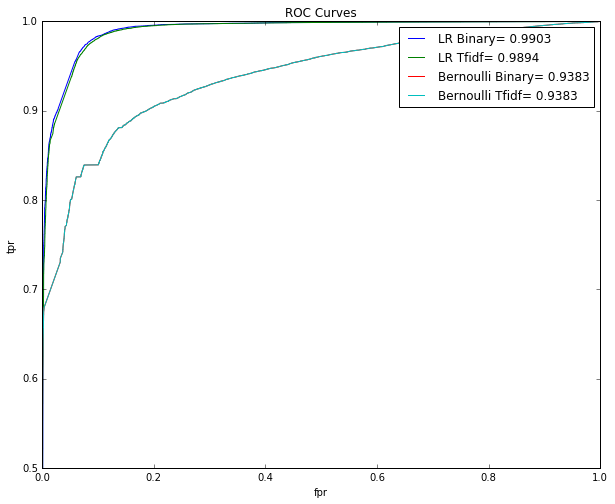

'Note : Since Bernoulli Binary and Tfidf both have same AUC, a single plot (light green) identifies both'

In [53]:
#Plotting graph

for fpr, tpr, roc_label in zip(fprs, tprs, roc_labels):
    plt.plot(fpr, tpr, label=roc_label)

plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.5, 1.0])
plt.show()

'''Note : Since Bernoulli Binary and Tfidf both have same AUC, a single plot (light green) identifies both'''

In [58]:
''' Here, Linear Regression, both binary and tfidf give better results than bernoulli. 
This may be because of the large size of dataset which is handled better by Linear Regression than Bernoulli. 
Also, Bernoulli tends to have higher error rates than Linear Regression. '''

' Here, Linear Regression, both binary and tfidf give better results than bernoulli. \nThis may be because of the large size of dataset which is handled better by Linear Regression than Bernoulli. \nAlso, Bernoulli tends to have higher error rates than Linear Regression. '

### Part 3: Network analysis and visualization (10 points)

In this part of the assignment we will analyze basic characteristics of the same Wikipedia network used in Part 2.


1. Prepare an edgefile for importing. First, map the node names to integer values. For data values, let's just start with the VOT column value. (2 points)

In [59]:
# Removing rows of df1 that are empty in 'SRC' column (1661 such rows found and deleted)
df1 = df1.replace({'SRC': {'': np.nan}}).dropna(subset=['SRC'])
df1.count()

SRC    196614
TGT    196614
RES    196614
YEA    196614
DAT    196614
TXT    196614
VOT    196614
dtype: int64

In [60]:
#Finding unique values of TGT as a new dataframe
unique_tgt = df1["TGT"].unique()
unique_tgt_df = DataFrame(unique_tgt, columns=["TGT_SRC_allwords"])


#Finding unique values of SRC as a new dataframe
unique_src = df1["SRC"].unique()
unique_src_df = DataFrame(unique_src, columns=["TGT_SRC_allwords"])


print unique_tgt_df.count() ; unique_src_df.count()

#Unique TGT and SRC words respectively (3491, 10415)

TGT_SRC_allwords    3491
dtype: int64


TGT_SRC_allwords    10415
dtype: int64

In [61]:
#Appending unique_tgt_df to unique_src_df to get the collection of all unique words as a df
unique_df_words = unique_src_df.append(unique_tgt_df, ignore_index=True)

#Remove duplicates
unique_df_words_noduplicates = unique_df_words.drop_duplicates()


print unique_df_words.count()
print "\n"
print ''' After removing duplicates : '''
print "\n"
print unique_df_words_noduplicates.count()


#i.e. 13906 - 11376 = 2530 duplicates

TGT_SRC_allwords    13906
dtype: int64


 After removing duplicates : 


TGT_SRC_allwords    11376
dtype: int64


In [62]:
#Generating mapping (mapping unique SRC and TGT(names) to integer values)
mapping = {k: v for v, k in enumerate(unique_df_words_noduplicates["TGT_SRC_allwords"].unique())}


#Changing the mapping (unique SRC and TGT name,code as corresponding int values) from dict to pd dataframe with separate
#columns for ease of use later

mapped = pd.DataFrame(mapping.items(), columns=['SRC_TGT_allwords', 'code'])

print mapped.count() ; mapped.head(3)

#i.e. all the 11376 unique words contained in SRC and TGT combined are mapped to integers

SRC_TGT_allwords    11376
code                11376
dtype: int64


,SRC_TGT_allwords,code
0,Scienceman123,10747
1,Mkamensek,8117
2,Dcheagle,1253


In [63]:
#Picking columns from df1 for the EDGE file (SRC, TGT, VOT)
df_for_edgelist = pd.DataFrame()
df_for_edgelist[["SRC", "TGT", "VOT"]] = df1[["SRC", "TGT", "VOT"]]

#Creating a copy of the EDGE file for : mapped values(integers)
edgefile_mapped = pd.DataFrame()
edgefile_mapped[["SRC", "TGT", "VOT"]]= df_for_edgelist[["SRC", "TGT", "VOT"]]

print df_for_edgelist.columns 

print df_for_edgelist.count() ; df_for_edgelist.head(3)

Index([u'SRC', u'TGT', u'VOT'], dtype='object')
SRC    196614
TGT    196614
VOT    196614
dtype: int64


,SRC,TGT,VOT
0,Steel1943,BDD,1
1,Cuchullain,BDD,1
2,INeverCry,BDD,1


In [64]:
#Creating a mapped dictionary of words and the codes(mapped integers)
words_dict = dict(zip(mapped.SRC_TGT_allwords, mapped.code))


In [65]:
#Replacing TGT words in the copy of EDGE file dataframe by the mapped integers (takes around 3 minutes)
edgefile_mapped.TGT = edgefile_mapped.TGT.replace(words_dict)

In [66]:
#Replacing SRC words in the copy of EDGE file dataframe by the mapped integers (takes around 5 minutes)
edgefile_mapped.SRC = edgefile_mapped.SRC.replace(words_dict)


In [67]:
print edgefile_mapped.count(); edgefile_mapped.head()


SRC    196614
TGT    196614
VOT    196614
dtype: int64


,SRC,TGT,VOT
0,0,488,1
1,1,488,1
2,2,488,1
3,3,488,1
4,4,488,1


In [68]:
np.savetxt('edge2.EDGE', edgefile_mapped.values, fmt='%5s', delimiter=" ")

In [69]:
edgefile_mapped['VOT'].value_counts()

1    143879
0     52735
Name: VOT, dtype: int64

In [70]:
edgefile_mapped.count()

SRC    196614
TGT    196614
VOT    196614
dtype: int64

In [71]:
#Saving mapped as EDGE files (for future graph use)
np.savetxt('edge_mappedx1.EDGE', edgefile_mapped.values, fmt='%5s', delimiter=" ")
np.savetxt('edge_wordsx1.EDGE', df_for_edgelist.values, fmt='%5s', delimiter=" ")


In [94]:
#cat edge_mappedx1.EDGE

In [73]:
#End of part 3 Question 1

2\. Now load the data as a graph object called 'Gwik'. (1 point)

In [74]:
import pandas as pd
import networkx as nx
from networkx import *
from datetime import datetime
import matplotlib.pyplot as plt
import numpy.random as npr
import numpy as np
import warnings
import pylab as plt
#from graph_tool.all import *

#import pygraphviz as pgv

In [75]:
Gwik=nx.DiGraph()
fh=open("edge_mappedx1.EDGE", 'rb')
Gwik = nx.parse_edgelist(fh, data=(('weight',float),))
fh.close()

3\. Confirm the number of nodes and edges in the graph object. (2 points)

In [76]:
num_of_nodes = number_of_nodes(Gwik)
num_of_edges = number_of_edges(Gwik)

print ("num_of_nodes :" , num_of_nodes )

print "\n"
print ("num_of_edges :" , num_of_edges)

('num_of_nodes :', 11376)


('num_of_edges :', 181073)


4\. Compute the degree, betweneess and closeness centrality measures for the graph. Are all 3 meaningful here given what you know about the nodes and edges? (2 points)

In [77]:
'''Degree centrality is meaningful in the context here since it gives the importance score of each node based on how
many links it has to other nodes. What it means here is, higher the degree centrality score of a node, more proportion/
number of RfAs the subsequent person/SRC has submitted (more number of votes by the person/SRC) '''


'Degree centrality is meaningful in the context here since it gives the importance score of each node based on how\nmany links it has to other nodes. What it means here is, higher the degree centrality score of a node, more proportion/\nnumber of RfAs the subsequent person/SRC has submitted (more number of votes by the person/SRC) '

In [78]:
deg_centrality = degree_centrality(Gwik)

In [79]:
'''Betweeness centrality gives an importance score which 
in the context means tells us, how many/proportion of votes a person x who is voted 
for/against submits votes of his own. This information may show the participation of votees'''

'Betweeness centrality gives an importance score which \nin the context means tells us, how many/proportion of votes a person x who is voted \nfor/against submits votes of his own. This information may show the participation of votees'

In [80]:
bet_centrality = betweenness_centrality(Gwik) #20 mins

In [81]:
'''Closeness centrality tells us the importance score of each node based on the shortest distance from that node to 
every other node in the graph. In context it means that, given I am a node,
how many influences/votes my votees(who I voted for) have submitted. This can help map the vote behavior persons,
for example, whether the voters and votees happen to vote for each other, i.e. voting for fellow friends.
'''

'Closeness centrality tells us the importance score of each node based on the shortest distance from that node to \nevery other node in the graph. In context it means that, given I am a node,\nhow many influences/votes my votees(who I voted for) have submitted. This can help map the vote behavior persons,\nfor example, whether the voters and votees happen to vote for each other, i.e. voting for fellow friends.\n'

In [82]:
close_centrality = closeness_centrality(Gwik, normalized=True) #12 mins

In [91]:
print dict(deg_centrality.items()[0:10])

{'5988': 0.00017582417582417582, '5989': 0.0007032967032967033, '5982': 0.0012307692307692308, '3480': 8.791208791208791e-05, '5980': 0.00035164835164835164, '5981': 0.0006153846153846154, '5986': 0.0007032967032967033, '5987': 0.00017582417582417582, '5984': 0.0002637362637362637, '5983': 0.0043076923076923075}


In [92]:
print dict(bet_centrality.items()[0:10])

{'5988': 2.975337474422694e-08, '5989': 1.9086656419082558e-07, '5982': 1.2582336380510461e-06, '3480': 0.0, '5980': 2.209070552941549e-08, '5981': 5.417546494302896e-07, '5986': 4.0270819625838227e-07, '5987': 1.4906306613717334e-08, '5984': 1.1776009080216344e-07, '5983': 0.0002264887081436705}


In [93]:
print dict(close_centrality.items()[0:10])

{'5988': 0.2724877230806085, '5989': 0.3138104171264621, '5982': 0.31270617989883437, '3480': 0.2809890815671163, '5980': 0.2832914103553906, '5981': 0.301988477978071, '5986': 0.303770763232388, '5987': 0.2656965336821452, '5984': 0.2957003223458459, '5983': 0.35101524409060053}


5\. Now visualize the graph. How do you visualize the edges to communicate vote values? (1 point)

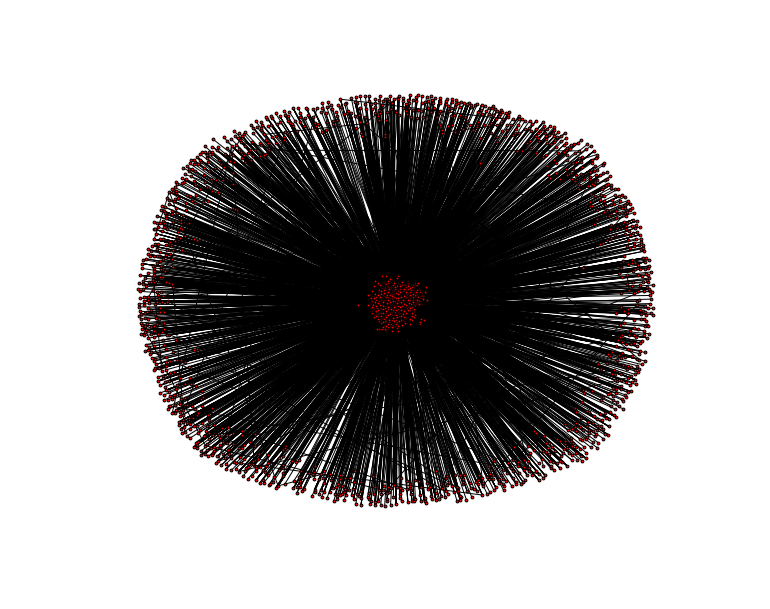

In [86]:
nx.draw(Gwik, node_size=8)
plt.savefig('graphsx1.png') # takes 6 mins

In [ ]:
                                            The End